In [1]:
import numpy as np
import operator
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>Регрессионный анализ. Линейная,  полиномиальная регрессия.</b></h3>

<p style="align: center;"><img align=center src="https://sun9-3.userapi.com/impg/rMxsV1l3x_NgXZnO2BR_Z_vQ5CMfAysGMkpVrg/5vII3kSwywk.jpg?size=1233x403&quality=96&proxy=1&sign=607ece16ae211ad91d8c9a1ba285c822&type=album"  width=900></p>
<div class="alert alert-info">
    <h2>Некоторые важные определения</h2>
<ul>
 <li><b>Классификация</b> - задача о разделении классов, по заданному набору признаков.</li>
 <li><b>Регрессия</b> - задача о предсказывании конкретного значения, но основе заданных параметров.</li>
 <li><b>Кластеризация</b>  - задача об объединении объектов в группы по каким-то уникальным общим свойствам/на основе каких-то закономерностях данных.</li>

</ul>
</div>

<h1><u>План урока</u></h1>

<p><font size="3" face="Arial">
<ul type="square"><li><a href="#1">Линейная регрессия.</a><ul><li><a href="#2">Метод максимального правдоподобия.</a></li><li><a href="#3">Практика. Регрессия "из коробки".</a></li></ul>
    <li><a href="#4">Полиномиальная регрессия.</a><ul></li><li><a href="#5">Практика на собственном датасете.</a></li></ul></font></p>

<h2>Линейная регрессия</h2>
<p id="1">Сегодня мы детально обсудим очень важный класс моделей машинного обучения – линейных. На данный момент развития машинного обучения и искусственного интелекта в целом можно строить довольно сложные модели, нейросети, но практически везде в основе лежат линейные модели. Они имеют большое кол-во преимуществ, например, такие как относительная простота вычислений и интепретация результатов, эффективность для описания многих процессов. Линейные модели используются в прогнозе цен, построении вероятностных моделей в кредитном скоринге, трейдинге, и т.д. </p>

Линейные модели описываются довольно простым линейным уравнением, где $y$ - целевая переменная, $w$ - вектор весов модели, $X$ - матрица наблюдений,  а $e$ - ошибка.$$y_i = \sum\limits^{m}_{j=1}w_j X_{ij} + e_i$$


<p style="align: center;"><img align=center src="https://wiki.loginom.ru/images/linear-regression.svg"  width=900></p>

<h3>Метод максимального правдоподобия</h3>
<p id="2">Если процесс описывается с помощью линеной модели, то необходимо определить параметры $\alpha$ модели, для максимально эффективной точности. На языке математики это означает, что нужно задать вероятность $p(y|x,\alpha)$ того, что модель с параметрами $\alpha$ и входными данными $x$ будет максимальной.</p>
Введем функцию правдоподобия, от которой нужно потребовать, чтобы произведение вероятностей по всем возможным $x$ с параметрами $\alpha$ было максимально.
$$W(\alpha) = \prod\limits_{i}p(x_i, \alpha)$$
Тогда прологарифмировав выражение, получаем функцию масимального правдоподобия. $$L(\alpha) = \sum\limits_i \log p(x_i,\alpha)$$
Чтобы максимизировать $L(\alpha)$ необходимо минимизировать среднеквадратичную ошибку между прогнозируемыми и фактическими значениями.
Подробное док-во и доп. информацию, можно почитать <a href="https://habr.com/ru/company/ods/blog/323890/#metod-maksimalnogo-pravdopodobiya">здесь</a>.

<div class="alert alert-info"><i>В каких случаях мы можем использовать линейную регресию? Какие данные мы можем использовать?</i>

Требования к данным.
<ol><li>Линейная зависимость целевой переменной</li><li>Нормальное распределение остатков</li><li>Постоянная изменчивость остатков. Гомоскедастиность.</li></ol>

</div>

<ol><b><li><b>Линейная зависимость целевой переменной</b></li></b> Линейная модель не сможет описвать сложные кривые и нелинейные данные. Должно быть хотя бы подозрение на линейность модели.<p style="align: center;"><img align=center src="https://sun9-35.userapi.com/impg/hP4Ue_r14n4_zs8d0UKA7LpZx74vPQDJy9Igqg/ve5O14Ggors.jpg?size=885x305&quality=96&proxy=1&sign=de7b6f1424868593e0970a3887ea4660&type=album"  width=900></p>
<b><li>Нормальное распределение остатков</li></b> Величины остатков, должны быть близки к нормальному распределению. Иначе, наша модель будет делать предсказание со смещением.<p style="align: center;"><img align=center src="https://sun9-7.userapi.com/impg/g-SaD6uQxQWVwJAXUC1RaH_NwOxIw0o0cpoD3Q/iMp5_Nqc82U.jpg?size=1207x400&quality=96&proxy=1&sign=865580edacb008724e7bc9d0c388a12d&type=album"  width=900></p><p style="align: center;"></p>
<b><li>Постоянная изменчивость остатков. Гомоскедастиность.</li></b>Если у данных есть четко выраженная постоянная изменичивость остатков на каком-то отрезке и нет случайности нормального распределения, то такие данные не будут эффективно описаны линейной регрессией. Пример гетероскедастичной последовательности:<p style="align: center;"><img align=center src="https://sun9-63.userapi.com/impg/W0twTR05RqqKhI1XjSm0dbgca0xSN2EnYZuQWQ/b1vaIVmtPEc.jpg?size=1207x400&quality=96&proxy=1&sign=3d6565dcf115e6c67a440ba0b7a6294f&type=album"  width=900></p><p style="align: center;"><img align=center src="https://sun9-50.userapi.com/impg/cwkPmjSk4m7SuvcJ-Ak6M-uKKlduPMOpjq3xUQ/z84UDGD2-l0.jpg?size=1207x280&quality=96&proxy=1&sign=0bf8df49169982f351ad37df7a9c5bd8&type=album"  width=900></p></ol>

<h3>Практика. Регрессия "из коробки".</h3>
<p id="3">Посмотрим линейные модели на практике. Будем решать задачу предсказания цены автомобиля, в зависимости от признаков.</p>

In [2]:
from sklearn.linear_model import LinearRegression # линейная регрессия

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/ahartz1/car-linear-regression/master/car_data.csv', delimiter = ',')
data.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


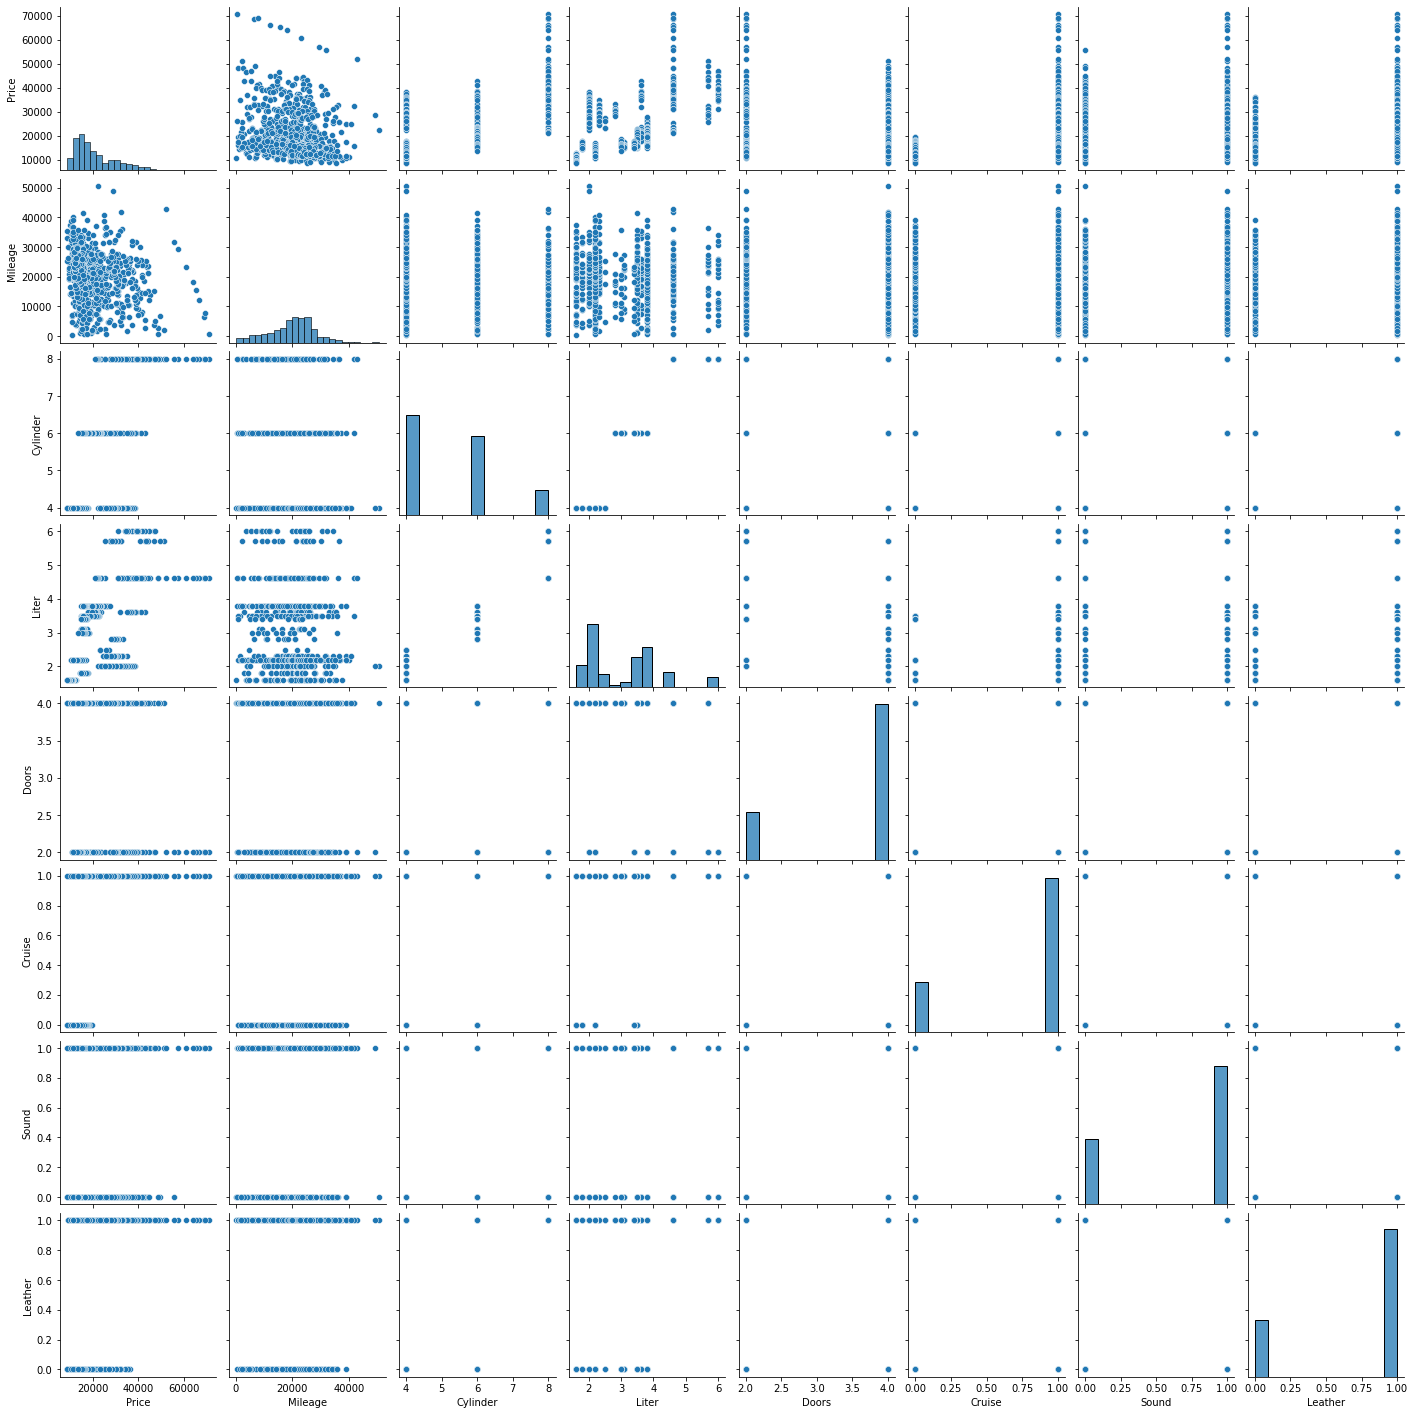

In [4]:
import seaborn as sns

sns.pairplot(data)

<p>Самое простое предположение. Цена автомобиля зависит от пробега.</p>

In [5]:
X = data[['Mileage']] # пробег
Y = data['Price']

In [6]:
model = LinearRegression()
model.fit(X,Y) # метод фит - метод обучения модели

LinearRegression()

In [7]:
y_predict = model.predict(X) # получаем предсказанное значение

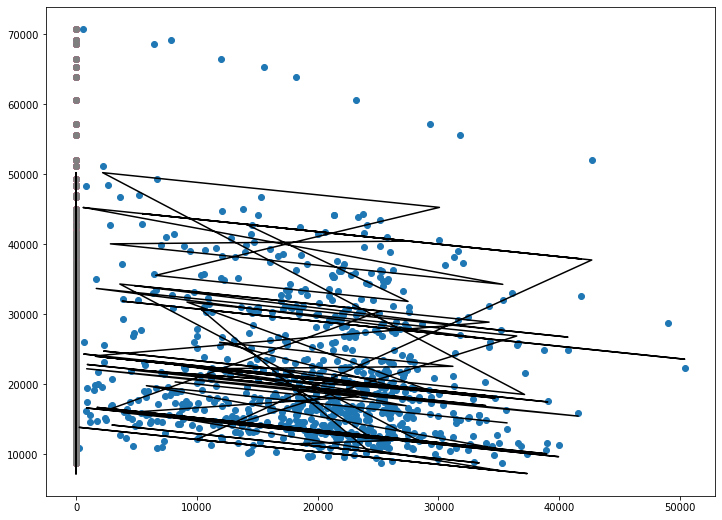

In [35]:
plt.figure(figsize=(12,9))
plt.plot(X, Y, 'o')
plt.plot(X, y_predict, 'k-')
plt.show()

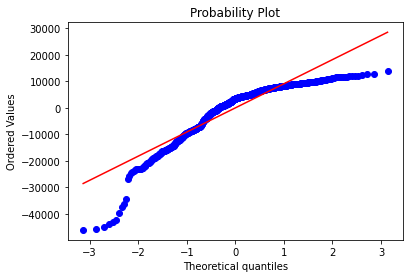

In [9]:
import pylab 
import scipy.stats as stats

stats.probplot(x = (y_predict - Y), dist="norm", plot=pylab)
pylab.show()


<p>Несмотря на то, что зависимость от пробега наблюдаема, но она не столь существенна, чтобы эффективно описать данные, как видим на графике. Нужно что-то поумнее.</p>

In [37]:
# будем использовать набор данных, а не только пробег
X = pd.get_dummies(data.loc[:, ['Mileage', 'Liter', "Make"]])
X.head()

,Mileage,Liter,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,8221,3.1,1,0,0,0,0,0
1,9135,3.1,1,0,0,0,0,0
2,13196,3.1,1,0,0,0,0,0
3,16342,3.1,1,0,0,0,0,0
4,19832,3.1,1,0,0,0,0,0


In [11]:
Y = data.loc[:, ['Price']]
Y.head() # предсказываемая цена

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [12]:
model.fit(X, Y)
y_predict = model.predict(X) # обучаем регрессию

<p>Попробуем нарисовать как расходится факт с предсказаниями.</p>

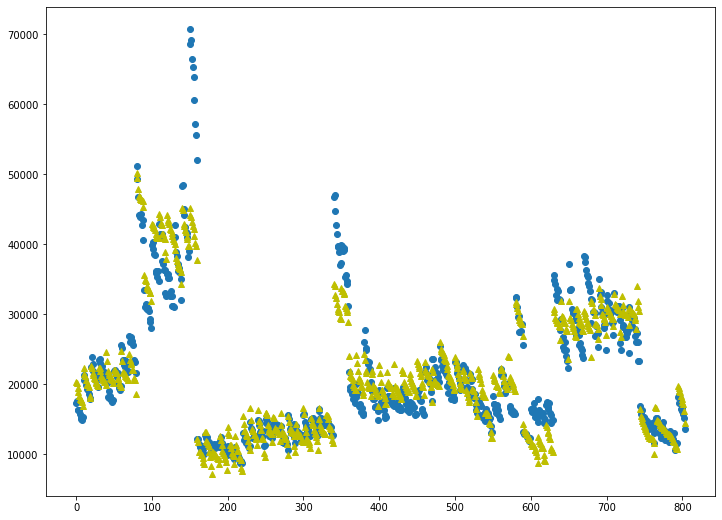

In [13]:
plt.figure(figsize=(12,9))
plt.plot(Y.index, Y, 'o')
plt.plot(Y.index, y_predict, 'y^')
plt.show() # видим как цена действительно накладывается на истину

In [14]:
del_y = Y.to_numpy() - y_predict

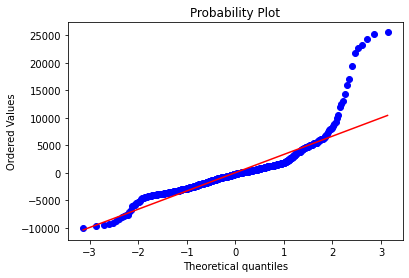

In [15]:
stats.probplot(del_y.reshape(-1), dist="norm", plot=pylab)
pylab.show()

<h2>Полиномиальная регрессия</h2>
<p id="4">Не всегда данные могут быть описаны (достаточно эффективно) линейной моделью. В некоторых задачах часто строятся полиномиальные модели. Здесь появляется дополнительный гиперпараметр - максимальная степень, в  которой могут находится параметры для описанния данных. Хороший пример как работает полиномиальная и линейная регрессия на нелинейных данных.</p>
<p><img src="https://miro.medium.com/proxy/1*QKcwvXU0UZ9YtkmRNKBM3w.gif"><img src="https://miro.medium.com/proxy/1*34dYVwi1ieVQBtwKd4xReg.gif"></p>

<h3>Практика на собственном датасете.</h3><p id="5">Сгенерируем свой собственный датасет для задачи полиномиальной регрессии.</p>

In [16]:
from sklearn.metrics import mean_squared_error, r2_score # подгружаем метрику mse и r2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [17]:
np.random.seed(0)
x = 2- 3 * np.random.normal(0, 1, 40)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 40) # заданы параметры при степенях

# преобразуем данный чтобы добавить новые оси
x = x[:, np.newaxis]
y = y[:, np.newaxis]

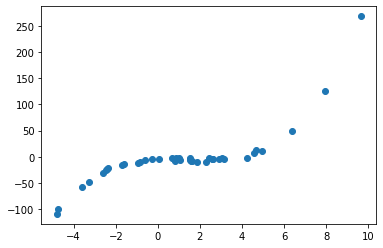

In [18]:
plt.scatter(x,y)
plt.show()

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
def make_regression(x_train, x_train_disp, y_train, x_test, x_test_disp, y_test):
  model = LinearRegression()
  model.fit(x_train, y_train)

  print("MSE TRAIN:", mean_squared_error(y_train,model.predict(x_train)))
  print("MSE TEST:", mean_squared_error(y_test,model.predict(x_test)))

  print("R2 TRAIN:", r2_score(y_train,model.predict(x_train)))
  print("R2 TEST:", r2_score(y_test,model.predict(x_test)))

  plt.scatter(x_train_disp, y_train, s=10, c='b')
  plt.scatter(x_test_disp, y_test, s=10, c='r')
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(x_train_disp,model.predict(x_train)), key=sort_axis)
  x_, y_poly_pred = zip(*sorted_zip)
  # sort the values of x before line plot
  plt.plot(x_, y_poly_pred, color='m')
  plt.show()
  return model

MSE TRAIN: 1261.616099992289
MSE TEST: 350.34628999751817
R2 TRAIN: 0.6648773024570928
R2 TEST: -2.436961889663798


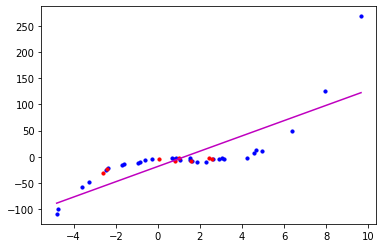

In [38]:
m = make_regression(x_train, x_train, y_train, x_test, x_test, y_test)

<p>Видим, что линейная модель описывает наши данные не очень хорошо. Это можно понять и по MSE, R2, и исходя из графика. Попробуем построить полиномиальную регрессию.</p>

MSE TRAIN: 864.9736367691058
MSE TEST: 251.27269058253896
R2 TRAIN: 0.7702373182623992
R2 TEST: -1.4650315590657108


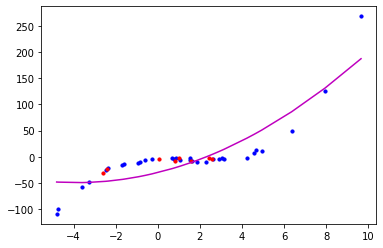

In [22]:
# теперь подаем эти признаки в линейную регресиию
# и проделаем все те же самые операции
polynomial_features= PolynomialFeatures(degree=2)
x_train_poly = polynomial_features.fit_transform(x_train)
x_test_poly = polynomial_features.fit_transform(x_test)
m = make_regression(x_train_poly, x_train, y_train, x_test_poly, x_test, y_test)

In [23]:
polynomial_features.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x0^2']

In [24]:
m.coef_

array([[ 0.        , 10.01522466,  1.29363594]])

<p>Проделаем то же самое, например, для 3 степени.</p>

MSE TRAIN: 4.971687923197764
MSE TEST: 5.447664032538512
R2 TRAIN: 0.9986793720624098
R2 TEST: 0.9465574084781668


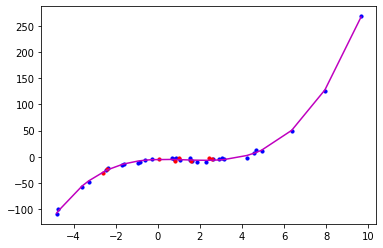

In [25]:
polynomial_features= PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(x_train)
x_test_poly = polynomial_features.fit_transform(x_test)
m = make_regression(x_train_poly, x_train, y_train, x_test_poly, x_test, y_test)

In [26]:
polynomial_features.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x0^2', 'x0^3']

In [27]:
m.coef_

array([[ 0.        ,  1.04483138, -1.88004651,  0.48545784]])

MSE TRAIN: 14.88184999665253
MSE TEST: 45.70789308000383
R2 TRAIN: 0.9960469387515445
R2 TEST: 0.5515971167443685


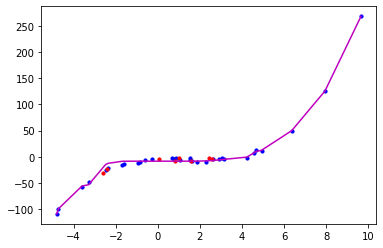

In [28]:
polynomial_features= PolynomialFeatures(degree=20)
x_train_poly = polynomial_features.fit_transform(x_train)
x_test_poly = polynomial_features.fit_transform(x_test)
m = make_regression(x_train_poly, x_train, y_train, x_test_poly, x_test, y_test)

In [29]:
m.coef_

array([[ 0.00000000e+00, -4.88989365e-08, -6.55426446e-10,
         2.69335200e-07,  2.55754258e-08,  2.15815567e-06,
         3.59616234e-07,  1.59611360e-05,  2.78262500e-06,
         9.76227053e-05,  3.59328906e-06,  3.72801167e-04,
        -1.53388731e-04, -3.89932043e-05,  2.27726855e-05,
        -5.68599598e-08, -1.06235027e-06,  1.03820348e-07,
         1.32474889e-08, -2.54181953e-09,  1.07121250e-10]])

<p>Видим что, с увелечением степени MSE и R2 упали до приемлемых значений, и наша модель достаточно хорошо описывается 3 степенью. Но стоит помнить, что чем больше мы задаем степень полинома, тем точнее полином будет накладываться на значения и модель будет переобучаться, поэтому с этим нужно быть осторожным. О переобучении речь будет идти в сл. уроках.</p>

<h2>Summary</h2>
<ol><li>Линейная регрессия лежит в основе многих сложных моделей, она позволяет очень эффективно предсказываать <b>общий тренд</b> данных, но также имеет и довольно <b>большие ограничения</b> на исследуемый датасет.</li><li>Полиномиальная регрессия умеет описывать <b>более сложные кривые</b> данных, которые не может описать линейная. <b>В зависимости от степени</b> полином будет описывать все точнее и точнее рассматриваемые данные, но не стоит забывать про <b>переобучение</b>.</li></ol>

<h3>Вопросы для самопроверки</h3>
<p><ol><li>При каких условиях актуален и эффективен алгоритм линейной регрессии? Какие требования должны накладываться на данные?</li><li>Как влияет степень полинома на описание данных полиномиальной регрессией? </li></ol></p>

<h1>Спасибо за внимание!</h1>